# Transfer Learning on Time Series Prediction

To find out more about the project, you can click **[here](https://medium.com/@nshanpotikyan/transfer-learning-for-time-series-prediction-4697f061f000)**. Here is an example how to get things going with the script.

In [1]:
%run -i Preprocessing.py
%run -i Models.py
%run -i Visualizing.py

Using TensorFlow backend.


In [2]:
N = 2000 
T = N / 10
t = np.linspace(0,T,N)
stdv = 0.3
sin_series = np.sin(t) + np.random.normal(0,stdv,N)
cos_series = np.cos(t) + np.random.normal(0,stdv,N)
abs_series = abs(sin_series)
incr_sin = t * sin_series
flunc_sin = (t-100) + (t-100) ** 2 * (np.sin((t-100)) + np.random.normal(0,stdv,N))
sin_trend = 20 * (np.sin( np.pi * (np.sqrt(4 * t + 1) - 1) + 0.5 * np.random.normal(0,stdv,N))) + t 

In [3]:
series_dict = {'t':t,
              'sin(t)':sin_series,
              'cos(t)':cos_series,
              '|sin(t)|':abs_series,
              'Increasing Sine':incr_sin,
              'Fluctuating Sine':flunc_sin,
              'Sine with a Trend':sin_trend}

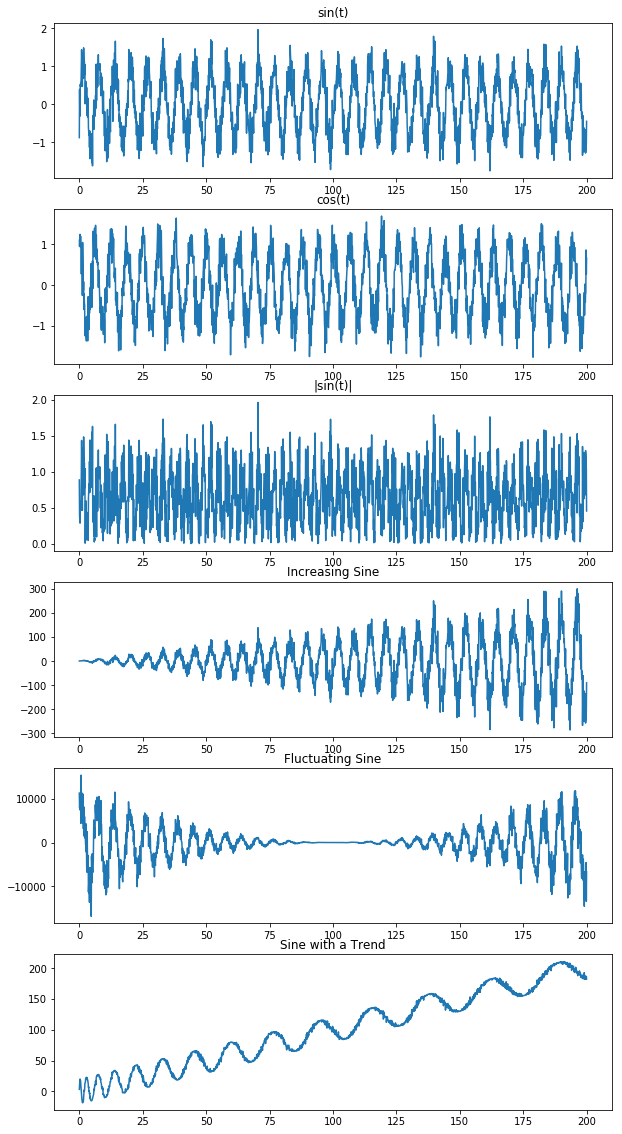

In [4]:
plotSeries(series_dict)

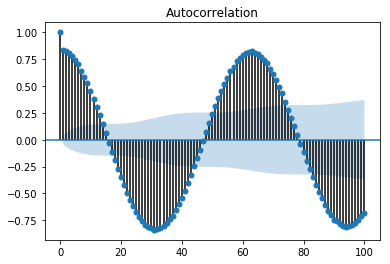

In [5]:
ACF(sin_series,lags=100)

In [6]:
# to perform a grid search over the parameter
# params_grid = {'input_size': [3,30,70],
#               'hidden_units':[100,[100,50],[100,50,50]],
#               'dropout': [True, False],
#               'learning_rate':[4e-5],
#               'n_ahead':[10],
#               'val_split': [0.2],
#               'epochs':[10],
#               'verbose':[False],
#               'plot':[False]}

# model, logs = GridSearch(sin_series,params_grid)

### Training a model on the source domain

Here we fit a model to the first series using the following hyperparameters and evaluate the model.

In [7]:
params = {'input_size': 70,
          'hidden_units':[100,50],
          'dropout': False,
          'learning_rate':4e-5,
          'n_ahead':10,
          'val_split': 0.2,
          'epochs':10,
          'verbose': True,
          'plot': True}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1224 samples, validate on 306 samples
Epoch 1/10
1224/1224 [==============================] - 72s 59ms/step - loss: 0.0524 - val_loss: 0.0188
Epoch 2/10
1224/1224 [==============================] - 69s 57ms/step - loss: 0.0115 - val_loss: 0.0069
Epoch 3/10
1224/1224 [==============================] - 73s 60ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 4/10
1224/1224 [==============================] - 70s 57ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 5/10
1224/1224 [==============================] - 68s 55ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 6/10
1224/1224 [==============================] - 69s 56ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 7/10
1224/1224 [==============================] - 70s 57ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 8/10
1224/1224 [==============================] - 68s 56ms/step - loss: 0.0075 - val_loss: 0.0068
E

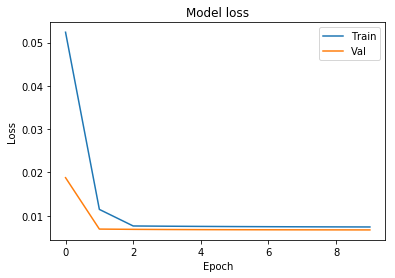

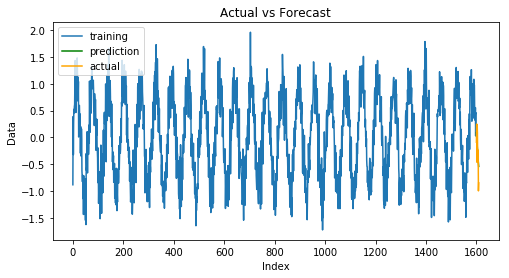

In [8]:
model, mse, hist = FitEvaluate(sin_series,params)

###  Transfer Learning Experiment

Now let's fit a similar model on the cosine series assuming that there is lack of data (only $100$ values instead of $2000$)


*** Fitting a model without knowledge transfer ***
Epoch 1/10
10/10 [==============================] - 3s 276ms/step - loss: 0.0558
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 0.0488
Epoch 3/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0423
Epoch 4/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0365
Epoch 5/10
10/10 [==============================] - 1s 70ms/step - loss: 0.0312
Epoch 6/10
10/10 [==============================] - 1s 71ms/step - loss: 0.0267
Epoch 7/10
10/10 [==============================] - 1s 55ms/step - loss: 0.0227
Epoch 8/10
10/10 [==============================] - 1s 54ms/step - loss: 0.0196
Epoch 9/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0172
Epoch 10/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0156


*** Fitting a model with knowledge transfer ***
Epoch 1/10
10/10 [==============================] - 3s 262ms/step - loss: 0.0136
Epoch 2/10
10/10

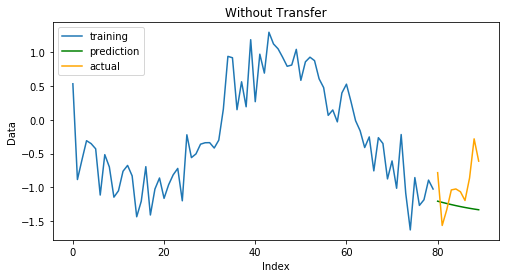

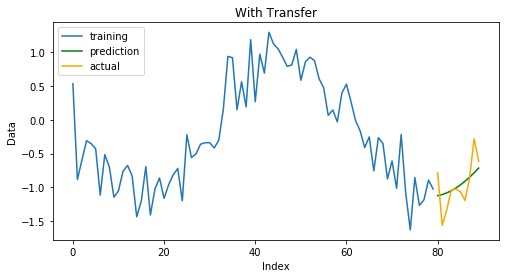

In [9]:
TransferLearning(cos_series[-100:],params,model=model)

In [10]:
# to fit on the whole dataset with 50 ahead predictions
# params['n_ahead'] = 50
# TransferLearning(cos_series,params,model=model)

# General Domain Tuning

*** Fitting a model on general domain ***
Epoch 1/10
110/110 [==============================] - 8s 75ms/step - loss: 0.1937
Epoch 2/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0503
Epoch 3/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0433
Epoch 4/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0404
Epoch 5/10
110/110 [==============================] - 6s 52ms/step - loss: 0.0381
Epoch 6/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0362
Epoch 7/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0346
Epoch 8/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0331
Epoch 9/10
110/110 [==============================] - 6s 53ms/step - loss: 0.0317
Epoch 10/10
110/110 [==============================] - 6s 54ms/step - loss: 0.0304

 *** Tuning a model on target domain ***
Epoch 1/10
10/10 [==============================] - 3s 336ms/step - loss: 0.0186
Epoch 2/10
10/

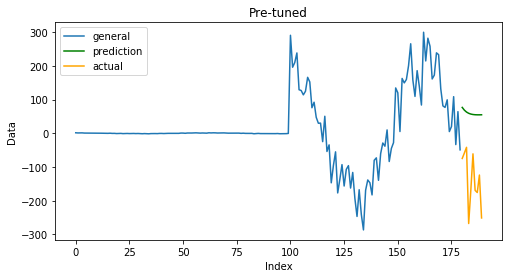

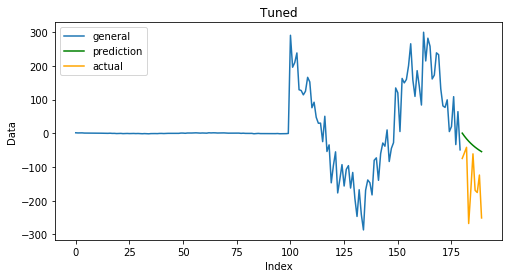

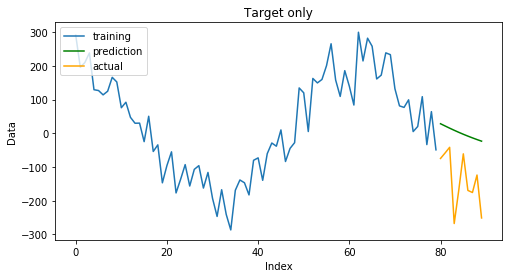

In [11]:
generalTuning(sin_series[-100:],incr_sin[-100:],params)